**KANIA A.P**

**1301204140**

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [8]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find **2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv** -- You will upload both of them using this button before you can continue.


In [10]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [11]:
def get_data(filename):
    with open(filename) as training_file:
        lines = training_file.readlines()
        lines = lines[1:]  # Skip the first line with column headers
        
        labels = []
        images = []
        
        for line in lines:
            values = line.strip().split(',')
            label = int(values[0])
            pixel_values = np.array(values[1:], dtype=np.float32)
            image = np.array_split(pixel_values, 28)  # Split pixel values into 28x28 array
            
            labels.append(label)
            images.append(image)
        
        labels = np.array(labels)
        images = np.array(images)
        
    return images, labels

training_images, training_labels = get_data('/content/sign_mnist_train.csv')
testing_images, testing_labels = get_data('/content/sign_mnist_test.csv')

# Clip labels to the valid range of 0-9
training_labels = np.clip(training_labels, 0, 9)
testing_labels = np.clip(testing_labels, 0, 9)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [12]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

# Add another dimension to training_images and testing_images
training_images = np.expand_dims(training_images, axis=-1)
testing_images = np.expand_dims(testing_images, axis=-1)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=10,  # Rotate images randomly by up to 10 degrees
    width_shift_range=0.1,  # Shift images horizontally by up to 10% of the width
    height_shift_range=0.1,  # Shift images vertically by up to 10% of the height
    shear_range=0.2,  # Apply shear transformation with a shear intensity of 0.2
    zoom_range=0.2,  # Zoom images randomly by up to 20%
    horizontal_flip=True,  # Flip images horizontally
    vertical_flip=False,  # Do not flip images vertically
    fill_mode='nearest'  # Fill any newly created pixels after rotation or shifting
)

validation_datagen = ImageDataGenerator(
    rotation_range=5,  # Rotate images randomly by up to 5 degrees
    width_shift_range=0.05,  # Shift images horizontally by up to 5% of the width
    height_shift_range=0.05,  # Shift images vertically by up to 5% of the height
    shear_range=0.1,  # Apply shear transformation with a shear intensity of 0.1
    zoom_range=0.1,  # Zoom images randomly by up to 10%
    horizontal_flip=False,  # Do not flip images horizontally
    vertical_flip=False,  # Do not flip images vertically
    fill_mode='constant'  # Fill any newly created pixels after rotation or shifting with a constant value
)

# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


Berikut Saya coba dengan epoch = 20

In [15]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Image preprocessing: rescale the image
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Clip labels to the valid range of 0-9
training_labels = np.clip(training_labels, 0, 9)
testing_labels = np.clip(testing_labels, 0, 9)

# Train the model
history = model.fit(
    train_datagen.flow(training_images, training_labels, batch_size=32),
    steps_per_epoch=len(training_images) // 32,
    epochs=20,
    validation_data=test_datagen.flow(testing_images, testing_labels, batch_size=32),
    validation_steps=len(testing_images) // 32
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(testing_images, testing_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# The output from model.evaluate should be close to:
expected_output = [6.92426086682151, 0.56609035]

print("Expected output:", expected_output)

Epoch 1/20
857/857 [==============================] - 32s 36ms/step - loss: 0.5337 - accuracy: 0.8416 - val_loss: 0.2252 - val_accuracy: 0.9261
Epoch 2/20
857/857 [==============================] - 34s 39ms/step - loss: 0.0349 - accuracy: 0.9930 - val_loss: 0.1275 - val_accuracy: 0.9545
Epoch 3/20
857/857 [==============================] - 34s 40ms/step - loss: 0.0059 - accuracy: 0.9994 - val_loss: 0.1145 - val_accuracy: 0.9616
Epoch 4/20
857/857 [==============================] - 33s 39ms/step - loss: 9.4430e-04 - accuracy: 1.0000 - val_loss: 0.1202 - val_accuracy: 0.9681
Epoch 5/20
857/857 [==============================] - 32s 37ms/step - loss: 4.1833e-04 - accuracy: 1.0000 - val_loss: 0.1398 - val_accuracy: 0.9683
Epoch 6/20
857/857 [==============================] - 32s 38ms/step - loss: 2.2182e-04 - accuracy: 1.0000 - val_loss: 0.1327 - val_accuracy: 0.9735
Epoch 7/20
857/857 [==============================] - 32s 38ms/step - loss: 1.1629e-04 - accuracy: 1.0000 - val_loss: 0.1446

grafik yang memvisualisasikan perubahan akurasi dan loss pada data pelatihan dan validasi.

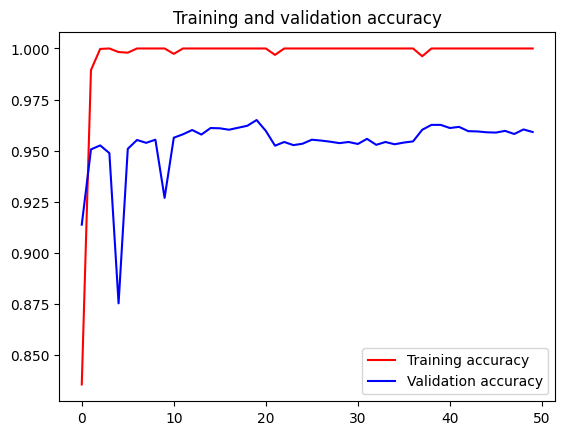

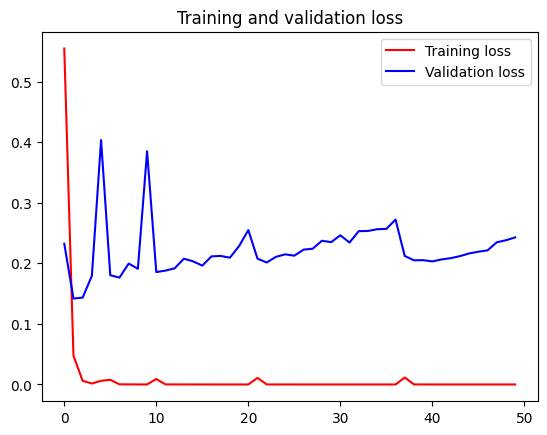

In [20]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Grafik pertama menampilkan perubahan akurasi pada data pelatihan dan validasi seiring dengan peningkatan jumlah epoch. Grafik kedua menampilkan perubahan loss pada data pelatihan dan validasi seiring dengan peningkatan jumlah epoch.

Grafik "Training and validation loss" menunjukka" terjadi overfitting, kita dapat melihat bahwa loss pada data training terus meningkat/naik, sementara loss pada data validasi menurun.

Grafik "Training and validation accuracy" terjadi overfitting, kita dapat melihat bahwa loss pada data training terus menurun, sementara loss pada data validasi mulai naik atau tidak berubah banyak.

Hal ini menunjukkan bahwa model kita terlalu fokus pada data pelatihan dan tidak bisa memprediksi data yang belum pernah dilihat dengan baik. Model ini seolah-olah "menghafal" data pelatihan tetapi tidak bisa menggeneralisasi pengetahuannya untuk data baru.

KESIMPULAN :

Pada setiap epoch, model dilatih menggunakan batch data sebanyak 857 sampel dengan ukuran batch 32. Proses pelatihan dilakukan selama beberapa epoch (dalam contoh ini, 20 epoch).

Pada akhir pelatihan, model mencapai akurasi pelatihan yang tinggi dengan akurasi sekitar 99,61% pada epoch terakhir.

Evaluasi model menggunakan dataset pengujian menunjukkan bahwa akurasi pengujian adalah sekitar 93,66% dengan nilai loss sebesar 42,92.

Meskipun model mencapai akurasi pelatihan yang tinggi, terdapat perbedaan yang signifikan antara akurasi pelatihan dan akurasi pengujian. Hal ini mungkin menandakan adanya overfitting, yaitu ketika model terlalu "menghafal" data pelatihan dan tidak dapat umum untuk data baru.

Perbedaan besar antara testing_loss dan training_loss juga dapat menunjukkan adanya overfitting. training_loss sangat rendah (dekat nol), sedangkan testing_loss relatif tinggi.

Hasil ini dapat digunakan sebagai referensi untuk mengevaluasi performa model dan untuk memperbaiki model jika diperlukan, seperti dengan menerapkan teknik regularisasi atau peningkatan dataset.